# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

## Perform API Calls

In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=962f47973599f1fb3469459756f56f45'

In [4]:
import json

weather_response = requests.get(target_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "sunrise": 1571544560,
        "sunset": 1571581150,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 95
            },
            "dt": 1571594400,
            "dt_txt": "2019-10-20 18:00:00",
            "main": {
                "grnd_level": 998.09,
                "humidity": 88,
                "pressure": 1020.58,
                "sea_level": 1020.58,
                "temp": 287.22,
                "temp_kf": 2.08,
                "temp_max": 287.22,
                "temp_min": 285.143
            },
            "sys": {
                "pod": "n"
            },
            "weather": [
                {
                    "description": "overcast clouds",
                    "icon": "04n",
                    "

In [5]:
# Create lists 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


In [6]:
count = 0

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        city_name.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
    print("I made it through the gauntlet. The message survived!")

Processing record 1 of Set 1 | mataura
I made it through the gauntlet. The message survived!
Processing record 2 of Set 1 | merauke
I made it through the gauntlet. The message survived!
Processing record 3 of Set 1 | ugoofaaru
I made it through the gauntlet. The message survived!
Processing record 4 of Set 1 | traiguen
I made it through the gauntlet. The message survived!
Processing record 5 of Set 1 | san juan de uraba
I made it through the gauntlet. The message survived!
Processing record 6 of Set 1 | ushuaia
I made it through the gauntlet. The message survived!
Processing record 7 of Set 1 | ponta do sol
I made it through the gauntlet. The message survived!
Processing record 8 of Set 1 | salalah
I made it through the gauntlet. The message survived!
Processing record 9 of Set 1 | rikitea
I made it through the gauntlet. The message survived!
Processing record 10 of Set 1 | puerto ayora
I made it through the gauntlet. The message survived!
Processing record 11 of Set 1 | port alfred
I 

Processing record 81 of Set 1 | kapaa
I made it through the gauntlet. The message survived!
Processing record 82 of Set 1 | jamestown
I made it through the gauntlet. The message survived!
Processing record 83 of Set 1 | lata
I made it through the gauntlet. The message survived!
Processing record 84 of Set 1 | dali
I made it through the gauntlet. The message survived!
Processing record 85 of Set 1 | ancud
I made it through the gauntlet. The message survived!
Processing record 86 of Set 1 | petropavlovsk-kamchatskiy
I made it through the gauntlet. The message survived!
Processing record 87 of Set 1 | kulunda
I made it through the gauntlet. The message survived!
Processing record 88 of Set 1 | castro
I made it through the gauntlet. The message survived!
Processing record 89 of Set 1 | upernavik
I made it through the gauntlet. The message survived!
Processing record 90 of Set 1 | hermanus
I made it through the gauntlet. The message survived!
Processing record 91 of Set 1 | codrington
I mad

Processing record 161 of Set 1 | airai
I made it through the gauntlet. The message survived!
Processing record 162 of Set 1 | norman wells
I made it through the gauntlet. The message survived!
Processing record 163 of Set 1 | majene
I made it through the gauntlet. The message survived!
Processing record 164 of Set 1 | caravelas
I made it through the gauntlet. The message survived!
Processing record 165 of Set 1 | northam
I made it through the gauntlet. The message survived!
Processing record 166 of Set 1 | kahului
I made it through the gauntlet. The message survived!
Processing record 167 of Set 1 | palana
I made it through the gauntlet. The message survived!
Processing record 168 of Set 1 | torbay
I made it through the gauntlet. The message survived!
Processing record 169 of Set 1 | huarmey
I made it through the gauntlet. The message survived!
Processing record 170 of Set 1 | sambava
I made it through the gauntlet. The message survived!
Processing record 171 of Set 1 | kovdor
I made i

Processing record 237 of Set 1 | tual
I made it through the gauntlet. The message survived!
Record not found
I made it through the gauntlet. The message survived!
Processing record 238 of Set 1 | pouebo
I made it through the gauntlet. The message survived!
Processing record 239 of Set 1 | ostersund
I made it through the gauntlet. The message survived!
Record not found
I made it through the gauntlet. The message survived!
Processing record 240 of Set 1 | nanakuli
I made it through the gauntlet. The message survived!
Processing record 241 of Set 1 | thompson
I made it through the gauntlet. The message survived!
Processing record 242 of Set 1 | takaka
I made it through the gauntlet. The message survived!
Processing record 243 of Set 1 | egvekinot
I made it through the gauntlet. The message survived!
Processing record 244 of Set 1 | ust-karsk
I made it through the gauntlet. The message survived!
Processing record 245 of Set 1 | alexandria
I made it through the gauntlet. The message survive

Processing record 313 of Set 1 | crib point
I made it through the gauntlet. The message survived!
Processing record 314 of Set 1 | clyde river
I made it through the gauntlet. The message survived!
Record not found
I made it through the gauntlet. The message survived!
Processing record 315 of Set 1 | byron bay
I made it through the gauntlet. The message survived!
Processing record 316 of Set 1 | yar-sale
I made it through the gauntlet. The message survived!
Processing record 317 of Set 1 | dakar
I made it through the gauntlet. The message survived!
Processing record 318 of Set 1 | port hedland
I made it through the gauntlet. The message survived!
Processing record 319 of Set 1 | san quintin
I made it through the gauntlet. The message survived!
Processing record 320 of Set 1 | maryville
I made it through the gauntlet. The message survived!
Processing record 321 of Set 1 | bethel
I made it through the gauntlet. The message survived!
Processing record 322 of Set 1 | placido de castro
I mad

Processing record 392 of Set 1 | bharatpur
I made it through the gauntlet. The message survived!
Processing record 393 of Set 1 | semirom
I made it through the gauntlet. The message survived!
Processing record 394 of Set 1 | itoman
I made it through the gauntlet. The message survived!
Processing record 395 of Set 1 | prince rupert
I made it through the gauntlet. The message survived!
Processing record 396 of Set 1 | santiago
I made it through the gauntlet. The message survived!
Processing record 397 of Set 1 | perth
I made it through the gauntlet. The message survived!
Record not found
I made it through the gauntlet. The message survived!
Processing record 398 of Set 1 | bocaiuva
I made it through the gauntlet. The message survived!
Processing record 399 of Set 1 | celestun
I made it through the gauntlet. The message survived!
Record not found
I made it through the gauntlet. The message survived!
Processing record 400 of Set 1 | naze
I made it through the gauntlet. The message survived

Processing record 472 of Set 1 | puerto escondido
I made it through the gauntlet. The message survived!
Processing record 473 of Set 1 | el sauzal
I made it through the gauntlet. The message survived!
Processing record 474 of Set 1 | sainte-agathe-des-monts
I made it through the gauntlet. The message survived!
Processing record 475 of Set 1 | baruun-urt
I made it through the gauntlet. The message survived!
Processing record 476 of Set 1 | curup
I made it through the gauntlet. The message survived!
Processing record 477 of Set 1 | ho chi minh city
I made it through the gauntlet. The message survived!
Processing record 478 of Set 1 | villa rica
I made it through the gauntlet. The message survived!
Processing record 479 of Set 1 | merano
I made it through the gauntlet. The message survived!
Processing record 480 of Set 1 | mount isa
I made it through the gauntlet. The message survived!
Processing record 481 of Set 1 | enshi
I made it through the gauntlet. The message survived!
Processing 

Processing record 552 of Set 1 | sulangan
I made it through the gauntlet. The message survived!
Processing record 553 of Set 1 | bilma
I made it through the gauntlet. The message survived!
Processing record 554 of Set 1 | opunake
I made it through the gauntlet. The message survived!
Processing record 555 of Set 1 | igunga
I made it through the gauntlet. The message survived!
Processing record 556 of Set 1 | port macquarie
I made it through the gauntlet. The message survived!
Processing record 557 of Set 1 | monaghan
I made it through the gauntlet. The message survived!
Processing record 558 of Set 1 | zlobin
I made it through the gauntlet. The message survived!
Processing record 559 of Set 1 | arcata
I made it through the gauntlet. The message survived!
Processing record 560 of Set 1 | daru
I made it through the gauntlet. The message survived!
Processing record 561 of Set 1 | harper
I made it through the gauntlet. The message survived!
Processing record 562 of Set 1 | marzuq
I made it 

In [7]:
# Convert array of JSONs into Pandas DataFrame
weather_dict = {"City": city_name, "Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness,
                "Wind Speed":wind_speed, "Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)


In [8]:
# Export the City_Data into a csv

weather_data.to_csv(r'output_data\my_weather_data.csv')

# Show Record Count
record_count = len(weather_data)
record_count

567

In [9]:

# Extract relevant fields from the data frame


# Export the City_Data into a csv

# Show Record Count


In [10]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1928,168.8643,41.47,88,85,7.83,NZ,1571594400
1,Merauke,-8.4903,140.3956,75.48,82,0,19.91,ID,1571594400
2,Ugoofaaru,5.6667,73.0000,83.14,63,100,8.86,MV,1571594400
3,Traiguen,-38.2500,-72.6834,59.96,51,93,6.73,CL,1571594400
4,San Juan de Uraba,8.7592,-76.5297,79.81,73,99,5.30,CO,1571594400


## Latitude vs. Temperature Plot

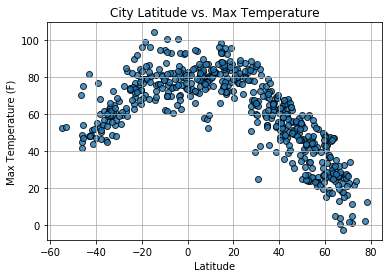

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat,
           max_temp,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("Lat VS Max_Temp Scatter")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

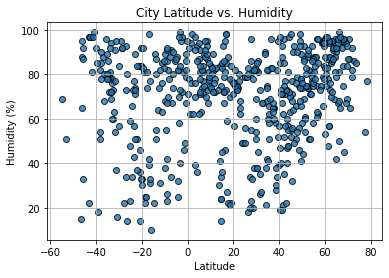

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("Lat VS Humidity Scatter")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

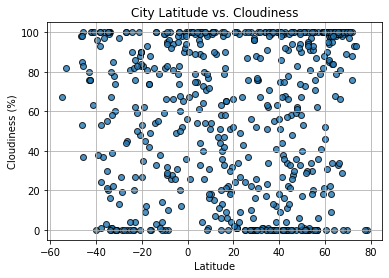

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("Lat VS Cloudiness Scatter")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

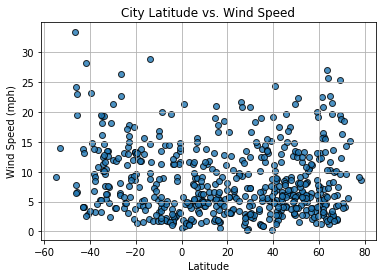

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("Lat VS Wind_Speed Scatter")

# Show plot
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
# Run regresson on southern hemisphere
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    
# Plot
plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
south_hem_df = weather_data.loc[weather_data["Latitude"] < 0,:]


###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8739123979621058


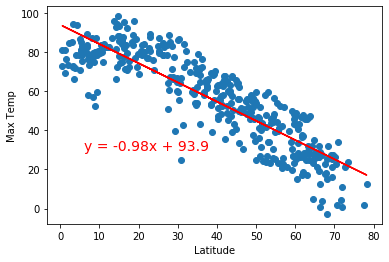

In [17]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig("Max_Temp VS Lat LR")

The r-squared is: 0.6934028227124418
The high r value indicates a strong positive correlation between latitude and max temperature.


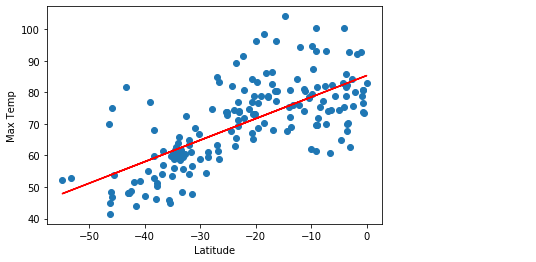

In [18]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig("S-Max_Temp VS Lat LR")

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15947307902380203


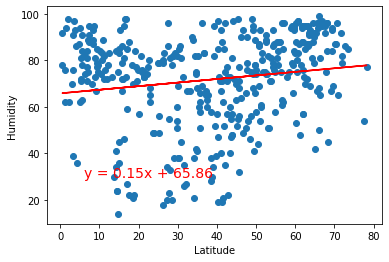

In [19]:
# Northern Hemisphere
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig("N-Humidity VS Lat LR")

The r-squared is: -0.04869287220577311
The low r values indicate a weak to no relationship between humidity and latitude.


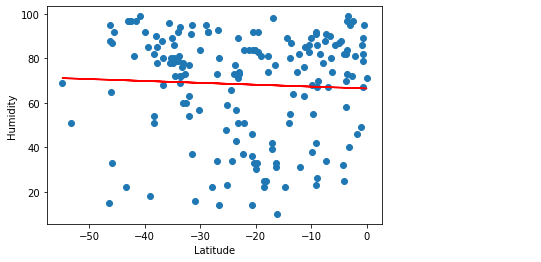

In [20]:
# Southern Hemisphere
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig("S-Humidity VS Lat LR")

print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12046726421557678


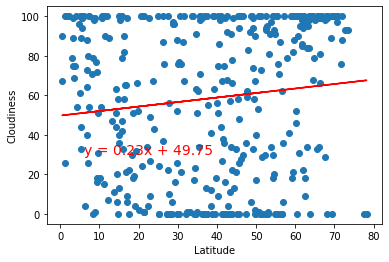

In [21]:
# Northern Hemisphere
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig("N-Cloud VS Lat LR")

The r-squared is: 0.031127248350424196
The low r values indicate a weak positive relationship between latitude and cloudiness.


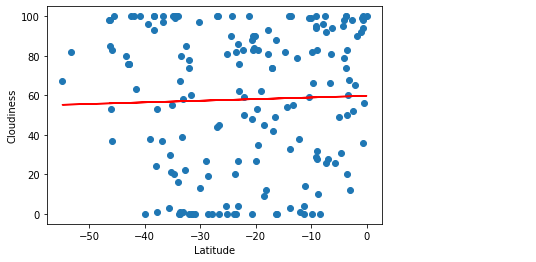

In [22]:
# Southern Hemisphere
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig("S-Cloud VS Lat LR")

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14289728513846242


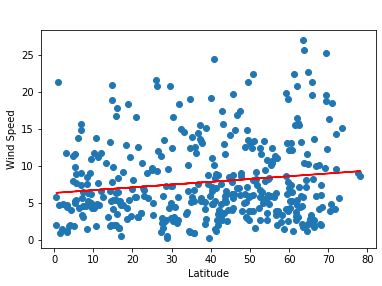

In [23]:
# Northern Hemisphere
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig("N-Wind VS Lat LR")

The r-squared is: -0.2837386027925861
The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


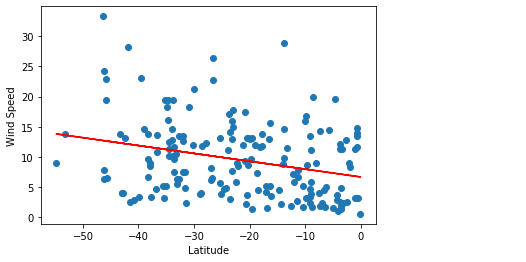

In [24]:
# Southern Hemisphere
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig("S-Wind VS Lat LR")

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.